<a href="https://colab.research.google.com/github/slv-ai/TEXT-CLASSIFICATION--NLP/blob/main/BBC_news_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [41]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [2]:
! pip install -q kaggle # install kaggle in colab
!rm -r ~/.kaggle # remove any existing .kaggle directory
!mkdir ~/.kaggle # create a new .kaggle directory


rm: cannot remove '/root/.kaggle': No such file or directory


In [4]:

from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"porselvim","key":"74de8aa9a96c119ba1b9756584f23590"}'}

In [5]:
!mv ./kaggle.json ~/.kaggle/ # move the kaggle.json file to the newly created directory
!chmod 600 ~/.kaggle/kaggle.json # change permnission
!ls -l ~/.kaggle/kaggle.json

-rw------- 1 root root 65 Aug 27 01:52 /root/.kaggle/kaggle.json


In [6]:
# download the compressed dataset
!kaggle competitions download -c learn-ai-bbc

  0% 0.00/1.85M [00:00<?, ?B/s]
100% 1.85M/1.85M [00:00<00:00, 131MB/s]


In [7]:
# create a 'data' directory inside "/content/"
!mkdir /content/data

# remove the zip file after unzipping the files in the 'data' directory
!unzip -q /content/learn-ai-bbc.zip -d /content/data/
!rm -r /content/learn-ai-bbc.zip

In [8]:

os.listdir('/content/data/')

['BBC News Train.csv', 'BBC News Test.csv', 'BBC News Sample Solution.csv']

In [9]:
# Checking training data
with open("/content/data/BBC News Train.csv", 'r') as csvfile:
    print(f"CSV header:\n {csvfile.readline()}")
    print(f"First data point:\n {csvfile.readline()}")


CSV header:
 ArticleId,Text,Category

First data point:
 1833,worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green li

In [10]:
# Checking testing data
with open("/content/data/BBC News Test.csv", 'r') as csvfile:
    print(f"CSV header:\n {csvfile.readline()}")
    print(f"First data point:\n {csvfile.readline()}")


CSV header:
 ArticleId,Text

First data point:
 1018,qpr keeper day heads for preston queens park rangers keeper chris day is set to join preston on a month s loan.  day has been displaced by the arrival of simon royce  who is in his second month on loan from charlton. qpr have also signed italian generoso rossi. r s manager ian holloway said:  some might say it s a risk as he can t be recalled during that month and simon royce can now be recalled by charlton.  but i have other irons in the fire. i have had a  yes  from a couple of others should i need them.   day s rangers contract expires in the summer. meanwhile  holloway is hoping to complete the signing of middlesbrough defender andy davies - either permanently or again on loan - before saturday s match at ipswich. davies impressed during a recent loan spell at loftus road. holloway is also chasing bristol city midfielder tom doherty.



In [11]:
train=pd.read_csv('data/BBC News Train.csv')
print("Shpe of Data",train.shape)
train.head(10)

Shpe of Data (1490, 3)


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
5,1582,howard truanted to play snooker conservative...,politics
6,651,wales silent on grand slam talk rhys williams ...,sport
7,1797,french honour for director parker british film...,entertainment
8,2034,car giant hit by mercedes slump a slump in pro...,business
9,1866,fockers fuel festive film chart comedy meet th...,entertainment


<Axes: xlabel='Category'>

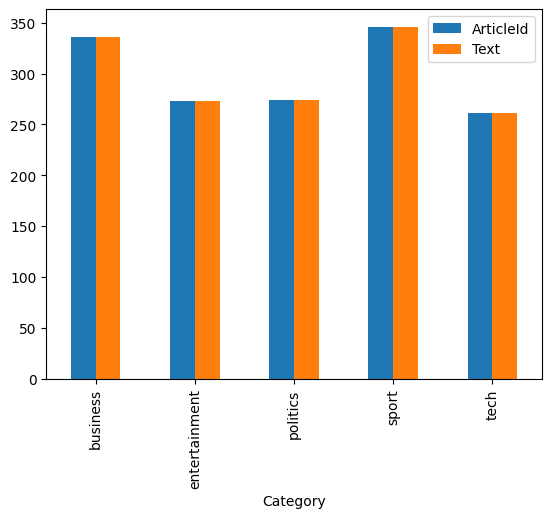

In [12]:
train.groupby('Category').count().plot(kind='bar')

In [13]:
test=pd.read_csv('data/BBC News Test.csv')
print("Shape of Data",train.shape)
test.head(10)

Shape of Data (1490, 3)


,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...
5,51,lewsey puzzle over disallowed try england s jo...
6,2025,blair blasts tory spending plans tony blair ha...
7,1479,former ni minister scott dies former northern ...
8,27,career honour for actor dicaprio actor leonard...
9,397,tsunami to hit sri lanka banks sri lanka s b...


Text cleaning

In [16]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

def preprocess(raw_text):

    # keep only words
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split
    words = letters_only_text.lower().split()

    # remove stopwords
    stopword_set = set(stopwords.words("english"))
    meaningful_words = [w for w in words if w not in stopword_set]

    #stemmed words
    ps = PorterStemmer()
    stemmed_words = [ps.stem(word) for word in meaningful_words]

    #join the cleaned words in a list
    cleaned_word_list = " ".join(stemmed_words)

    return cleaned_word_list

In [17]:
train['Text'] = train['Text'].apply(lambda line : preprocess(line))

In [27]:
train.head()

,ArticleId,Text,Category,length
0,1833,worldcom ex boss launch defenc lawyer defend f...,business,1194
1,154,german busi confid slide german busi confid fe...,business,1282
2,1101,bbc poll indic econom gloom citizen major nati...,business,1762
3,1976,lifestyl govern mobil choic faster better funk...,tech,2111
4,917,enron boss payout eighteen former enron direct...,business,1318


In [26]:
train.shape

(1490, 4)

In [22]:
#calculate the length of a text
train["length"]=train['Text'].apply(len)

(array([835., 520., 118.,   9.,   3.,   2.,   0.,   2.,   0.,   1.]),
 array([  303. ,  1275.7,  2248.4,  3221.1,  4193.8,  5166.5,  6139.2,
         7111.9,  8084.6,  9057.3, 10030. ]),
 <BarContainer object of 10 artists>)

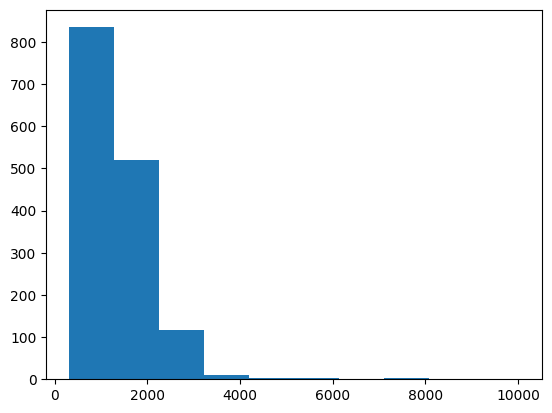

In [23]:
plt.hist(x=train['length'])

In [30]:
max_length=train['Text'].apply(lambda x : len(x)).max()
print(max_length)

10030


In [36]:
train.head()

,ArticleId,Text,Category,length
0,1833,worldcom ex boss launch defenc lawyer defend f...,business,1194
1,154,german busi confid slide german busi confid fe...,business,1282
2,1101,bbc poll indic econom gloom citizen major nati...,business,1762
3,1976,lifestyl govern mobil choic faster better funk...,tech,2111
4,917,enron boss payout eighteen former enron direct...,business,1318


In [19]:

#nltk.download('punkt')
#import string

#i=0
#train['clean_text']= ''
#for row in train.Text:
  #add spaces to prevent word merging
#  row=row.replace(' . ',' . ',row.count(' .')).replace(' ,',' ,',row.count(' ,'))
  #split into words
#  tokens=word_tokenize(row)
  #convert to lowercase
 # tokens=[token.lower() for token in tokens]
  #remove punctuation
  #table=str.maketrans('','',string.punctuation)
  #words=[token.translate(table) for token in tokens]
  #remove non alphabetic
  #words=[word for word in words if word.isalnum()]
  #filter stop words
  #stop_words=set(stopwords.words('english'))
 # words=[word for word in words if not word in stop_words]
  #print words
 # train['clean_text'][i]='  '.join(words)
  #i += 1
#train.clean_text=' '+train.clean_text
#train.head()


In [37]:
#split into training and test sets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x_train,x_test,y_train,y_test=train_test_split(train.Text,train.Category,train_size=0.8)

In [38]:
#label the target
encoder=preprocessing.LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.fit_transform(y_test)

In [39]:
y_train

array([4, 0, 0, ..., 0, 3, 1])

In [40]:
x_train[0]

'worldcom ex boss launch defenc lawyer defend former worldcom chief berni ebber batteri fraud charg call compani whistleblow first wit cynthia cooper worldcom ex head intern account alert director irregular account practic us telecom giant warn led collaps firm follow discoveri bn bn account fraud mr ebber plead guilti charg fraud conspiraci prosecut lawyer argu mr ebber orchestr seri account trick worldcom order employe hide expens inflat revenu meet wall street earn estim ms cooper run consult busi told juri new york wednesday extern auditor arthur andersen approv worldcom account earli said andersen given green light procedur practic use worldcom mr ebber lawyer said unawar fraud argu auditor alert problem ms cooper also said sharehold meet mr ebber often pass technic question compani financ chief give brief answer prosecut star wit former worldcom financi chief scott sullivan said mr ebber order account adjust firm tell hit book howev ms cooper said mr sullivan mention anyth uncomf

Text Preprocessing

In [44]:
#count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer(analyzer='word',token_pattern=r'\w{1,}')
count_vect.fit(train.Text)#regexp selects tokens of 1 or more alphanumeric characters
#xall=count_vect.transform(train.Text)
xtrain_cv=count_vect.transform(x_train)
xtest_cv=count_vect.transform(x_test)

In [50]:
#tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

#word level tf-idf
tf_vect=TfidfVectorizer(analyzer='word',token_pattern=r'\w{1,}',max_features=None)
tf_vect.fit(train.Text)#regexp selects tokens of 1 or more alphanumeric characters
xtrain_tf=tf_vect.transform(x_train)
xtest_tf=tf_vect.transform(x_test)

In [51]:
#Ngram level tf-idf
tf_vect_ngram=TfidfVectorizer(analyzer='word',token_pattern=r'\w{1,}',ngram_range=(2,3),max_features=None)
tf_vect_ngram.fit(train.Text)#measure bi and tri grams
xtrain_tf_ngram=tf_vect_ngram.transform(x_train)
xtest_tf_ngram=tf_vect_ngram.transform(x_test)

Fit the Model

In [49]:
from sklearn import metrics
def train_model(classifier,train_features,label,test_features):
  #fit training data
  classifier.fit(train_features,label)
  #predict testing data labels
  predictions=classifier.predict(test_features)

  return metrics.accuracy_score(predictions,y_test)

Native Bayes

In [53]:
from sklearn import naive_bayes

#countvectorizer
nb_cv=train_model(naive_bayes.MultinomialNB(),xtrain_cv,y_train,xtest_cv)
print("[naive bayes] count vecorizer accuracy : ",round(nb_cv,3))

#word level TF-IDF vectors
nb_tf=train_model(naive_bayes.MultinomialNB(),xtrain_tf,y_train,xtest_tf)
print("[naive bayes] TF_IDF accuracy : ",round(nb_tf,3))

#N gram level TF-IDF vectors
nb_ngram_tf=train_model(naive_bayes.MultinomialNB(),xtrain_tf_ngram,y_train,xtest_tf_ngram)
print("[naive bayes] Ngram level accuracy : ",round(nb_ngram_tf,3))

[naive bayes] count vecorizer accuracy :  0.983
[naive bayes] TF_IDF accuracy :  0.987
[naive bayes] Ngram level accuracy :  0.742


Logistic Regression

In [54]:
from sklearn import linear_model

#countvectorizer
lr_cv=train_model(linear_model.LogisticRegression(),xtrain_cv,y_train,xtest_cv)
print("[logistic regression] count vecorizer accuracy : ",round(lr_cv,3))

#word level TF-IDF vectors
lr_tf=train_model(linear_model.LogisticRegression(),xtrain_tf,y_train,xtest_tf)
print("[logistic regression] TF_IDF accuracy : ",round(lr_tf,3))

#N gram level TF-IDF vectors
lr_ngram_tf=train_model(linear_model.LogisticRegression(),xtrain_tf_ngram,y_train,xtest_tf_ngram)
print("[naive bayes] N gram level accuracy : ",round(lr_ngram_tf,3))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[logistic regression] count vecorizer accuracy :  0.98
[logistic regression] TF_IDF accuracy :  0.987
[naive bayes] N gram level accuracy :  0.685


Support vector machines(SVM)

In [55]:
from sklearn import svm

#countvectorizer
svm_cv=train_model(svm.SVC(),xtrain_cv,y_train,xtest_cv)
print("[support vector machines] count vectorizer accuracy : ",round(svm_cv,3))

#word level TF-IDF vectors
svm_tf=train_model(svm.SVC(),xtrain_tf,y_train,xtest_tf)
print("[support vector machines] TF_IDF accuracy : ",round(svm_tf,3))

#N gram level TF-IDF vectors
svm_ngram_tf=train_model(svm.SVC(),xtrain_tf_ngram,y_train,xtest_tf_ngram)
print("[support vector machines] N gram level accuracy : ",round(svm_ngram_tf,3))

[support vector machines] count vectorizer accuracy :  0.973
[support vector machines] TF_IDF accuracy :  0.98
[support vector machines] N gram level accuracy :  0.56


Random Forest

In [56]:
from sklearn import ensemble

#countvectorizer
rf_cv=train_model(ensemble.RandomForestClassifier(),xtrain_cv,y_train,xtest_cv)
print("[Random Forest] count vectorizer accuracy : ",round(rf_cv,3))

#word level TF-IDF vectors
rf_tf=train_model(ensemble.RandomForestClassifier(),xtrain_tf,y_train,xtest_tf)
print("[Random Forest] TF_IDF accuracy : ",round(rf_tf,3))

#N gram level TF-IDF vectors
rf_ngram_tf=train_model(ensemble.RandomForestClassifier(),xtrain_tf_ngram,y_train,xtest_tf_ngram)
print("[Random Forest] N gram level accuracy : ",round(rf_ngram_tf,3))

[Random Forest] count vectorizer accuracy :  0.96
[Random Forest] TF_IDF accuracy :  0.98
[Random Forest] N gram level accuracy :  0.819


Extreme Gradient Boosting

In [57]:
import xgboost

#countvectorizer
xgb_cv=train_model(xgboost.XGBClassifier(),xtrain_cv,y_train,xtest_cv)
print("[Xtreme Gradient Boosting] count vectorizer accuracy : ",round(xgb_cv,3))

#word level TF-IDF vectors
xgb_tf=train_model(xgboost.XGBClassifier(),xtrain_tf,y_train,xtest_tf)
print("[Xtreme Gradient Boosting] TF_IDF accuracy : ",round(xgb_tf,3))

#N gram level TF-IDF vectors
xgb_ngram_tf=train_model(xgboost.XGBClassifier(),xtrain_tf_ngram,y_train,xtest_tf_ngram)
print("[Xtreme Gradient Boosting] N gram level accuracy : ",round(xgb_ngram_tf,3))

[Xtreme Gradient Boosting] count vectorizer accuracy :  0.97
[Xtreme Gradient Boosting] TF_IDF accuracy :  0.963
[Xtreme Gradient Boosting] N gram level accuracy :  0.836


Compare Models

In [58]:
pd.DataFrame([[nb_cv,nb_tf,nb_ngram_tf],
              [lr_cv,lr_tf,lr_ngram_tf],
              [svm_cv,svm_tf,svm_ngram_tf],
              [rf_cv,rf_tf,rf_ngram_tf],
              [xgb_cv,xgb_tf,xgb_ngram_tf]],
            columns=['count vectorizer','word TF-IDF','N-gram TF-IDF'],
             index=['NAIVE BAYES','LOGISTIC REGRESSION','SUPPORT VECTOR MACHINES','RANDOM FOREST','XTREME GRADIENT']).round(3)

,count vectorizer,word TF-IDF,N-gram TF-IDF
NAIVE BAYES,0.983,0.987,0.742
LOGISTIC REGRESSION,0.980,0.987,0.685
SUPPORT VECTOR MACHINES,0.973,0.980,0.560
RANDOM FOREST,0.960,0.980,0.819
XTREME GRADIENT,0.970,0.963,0.836
